In [1]:
import numpy as np
import pylab as plt
import os
import scipy.integrate
print(os.getcwd())

/home/wester/Privat/projects/corona/JupyterLab/SEIR


# SEIR Model

* N - total number
* S - susceptible
* E - exposed
* I - infectious
* R - recovered

$\dfrac{dS(t)}{dt} = - \dfrac{R_t}{T_{inf}} I(t) \dfrac{S(t)}{N}$

$\dfrac{dE(t)}{dt} = \dfrac{R_t}{T_{inf}} I(t) \dfrac{S(t)}{N} - \dfrac{1}{T_{inc}} E(t)$ 

$\dfrac{dI(t)}{dt} = \dfrac{1}{T_{inc}} E(t-t_{lag}) - \dfrac{1}{T_{inf}} I(t)$ 

$\dfrac{dR(t)}{dt} = \dfrac{1}{T_{inf}} I(t)$

* $R_t$ - base reproduction rate = 2.3
* $T_{inc}$ - incubation period = 5 days
* $T_{inf}$ - infectious period = 2.5 days

[Epidemic calculator](https://gabgoh.github.io/COVID/index.html?CFR=0.02&D_hospital_lag=5&D_incbation=5.2&D_infectious=2.9&D_recovery_mild=11.1&D_recovery_severe=28.6&I0=1&InterventionAmt=1&InterventionTime=100&P_SEVERE=0.2&R0=2.2&Time_to_death=32&logN=15.761420707019587)

[SEIR Model Wikipedia](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology)

[The Spatiotemporal Epidemiological Modeler (STEM) Project](https://www.eclipse.org/stem/)

[Reproduction numbers of infectious disease models](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6002118/)

In [2]:
def seir(y, t, Rt, Tinc, Tinf, N):
    S, E, I, R = y[0], y[1], y[2], y[3]
    a  = Rt/Tinf/N
    dS =  -a * S * I
    dE =   a * S * I - E / Tinc
    dI =               E / Tinc - I / Tinf
    dR =                          I / Tinf  
    return np.array([dS, dE, dI, dR])


def plot(y, t, severe = 5.0e-2, fatal = 5.0e-3):
    c = 1.0e-6
    S = y[:,0]
    E = y[:,1]
    I = y[:,2]
    R = y[:,3]
    plt.plot(t, S*c, 'g', label="susceptible")
    plt.plot(t, E*c, 'b', label="exposed")
    plt.plot(t, I*c, 'r', label="infectious")
    plt.plot(t, R*c, 'm', label="recovered")
    plt.xlabel("time [days]")
    plt.ylabel("number [million]")
    plt.legend(loc = 'best')

    plt.figure()
    plt.semilogy(t, E, 'b', label="exposed")
    plt.semilogy(t, I, 'r', label="infectious")
    plt.xlabel("time [days]")
    plt.ylabel("number")
    plt.legend(loc = 'best')
    plt.axis([None, None, 1.0, None])

    plt.figure()
    plt.semilogy(t, I * severe, 'r', label="severe")
    plt.semilogy(t, R * severe, 'm', label="cumulated severe")
    plt.xlabel("time [days]")
    plt.ylabel("number")
    plt.legend(loc = 'best')
    plt.axis([None, None, 1.0, None])

    plt.figure()
    plt.semilogy(t, I * fatal, 'k', label="dead")
    plt.semilogy(t, R * fatal, 'c', label="cumulated dead")
    plt.xlabel("time [days]")
    plt.ylabel("number")
    plt.legend(loc = 'best')
    plt.axis([None, None, 1.0, None])

    plt.show()



phase 1 end day        = 63
number I               = 1.594e+05
number E + I           = 5.884e+05
number R               = 4.577e+05
fatality rate observed = 3.33%
number of deaths       = 35272


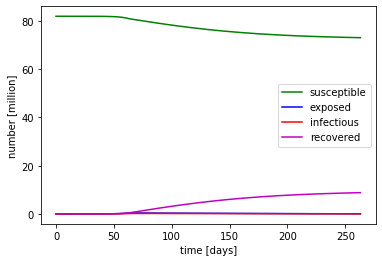

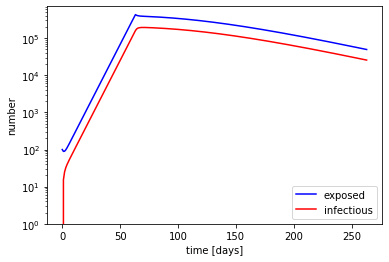

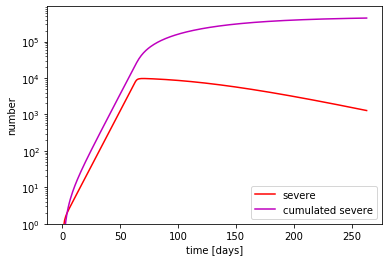

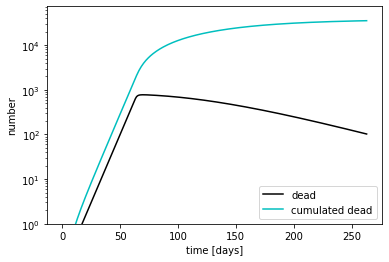

In [5]:
##############################################################
# phase 1 large R

Rt   = 2.3
Tinc = 5.0
Tinf = 2.5
N    = 8.2e7

severe = 5.0e-2
fatal  = 4.0e-3

tmax = 360.0
y0   = np.array([N, 100.0, 0, 0.0])
t    = np.mgrid[0.0:tmax:360j]
args = (Rt, Tinc, Tinf, N)

y1 = scipy.integrate.odeint(seir, y0, t, args=(Rt, Tinc, Tinf, N))

# end of phase 1 
D0 = 1.8e3
D = y1[:,3] * fatal
D = np.where(D > D0, 0, 1)
ti = sum(D)
###############################
print("phase 1 end day        = %d" % ti)
print("number I               = %.3e" % (y1[ti,2]))
print("number E + I           = %.3e" % (y1[ti,1]+y1[ti,2]))
print("number R               = %.3e" % (y1[ti,3]))
prozent = '%'
print("fatality rate observed = %4.2f%s" % (5000/150000.0 * 100, prozent))

##############################################################
# phase 2 smaller R

Rt   = 1.0
Tinc = 5.0
Tinf = 2.5
N    = 8.2e7

severe = 5.0e-2
fatal  = 4.0e-3

tmax = 200
y0   = y1[ti,:]
t    = np.mgrid[0.0:float(tmax):tmax*1j]
args = (Rt, Tinc, Tinf, N)

y2 = scipy.integrate.odeint(seir, y0, t, args=(Rt, Tinc, Tinf, N))

##############################################################
# append
y1 = y1[:ti,:]
y  = np.append(y1, y2, axis = 0)
t  = np.mgrid[0.0:float(y.shape[0]):y.shape[0]*1j]

###############################
print("number of deaths       = %.0f" % (y[-1,3] * fatal))

# plot
plot(y, t, severe = severe, fatal = fatal)
